In [102]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import torch
from cvae import fire

In [103]:
pkl_file = open('fire_frames_with_external_fata.pkl', 'rb')
frames = pkl.load(pkl_file)

In [104]:
frame_pairs = []
for i in range(len(frames)):
    fire_frames = torch.from_numpy(np.array(frames[i][0]))
    wind_speed_frames = torch.from_numpy(np.array(frames[i][1]))
    wind_direction_frames = torch.from_numpy(np.array(frames[i][2]))
    if len(fire_frames) > 10:
        frame_sets = torch.stack([fire_frames[:-1], wind_speed_frames[:-1], wind_direction_frames[:-1], fire_frames[1:]], dim=1)
        frame_pairs.append(frame_sets)

frame_pairs = torch.cat(frame_pairs, dim=0)
    

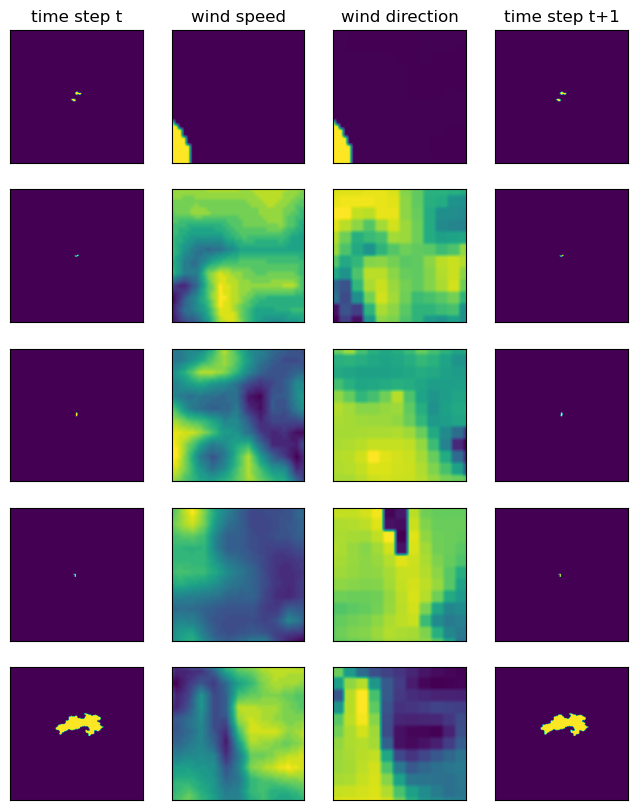

In [111]:
fig, ax = plt.subplots(5, 4, figsize=(8, 10))
# shuffle frame pairs
frame_pairs = frame_pairs[torch.randperm(frame_pairs.shape[0])]
for i,x in enumerate(range(5)):
    ax[i, 0].imshow(frame_pairs[x][0])
    ax[i, 1].imshow(frame_pairs[x][1])
    ax[i, 2].imshow(frame_pairs[x][2])
    ax[i, 3].imshow(frame_pairs[x][3])
ax[0,0].set_title('time step t')
ax[0,1].set_title('wind speed')
ax[0,2].set_title('wind direction')
ax[0,3].set_title('time step t+1')
# remove ticks
for ax in ax.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [ ]:
frame_pairs.shape

torch.Size([10896, 4, 224, 224])

In [ ]:
frame_pairs = torch.load('data/frame_pairs.pt')

In [ ]:
# concatenate the frames into a single tensor of shape Nx224x448
frames = torch.cat([frames[:,0], frames[:,1]], dim=2)

In [ ]:
# save the frames as a pickle file
torch.save(frames, 'data/frame_pairs.pt')

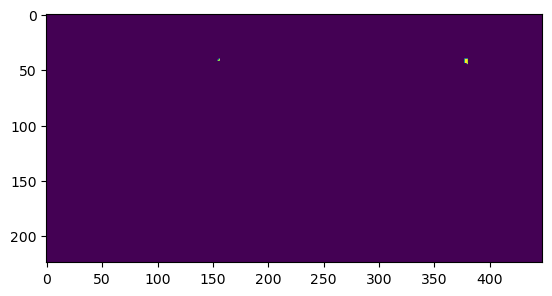

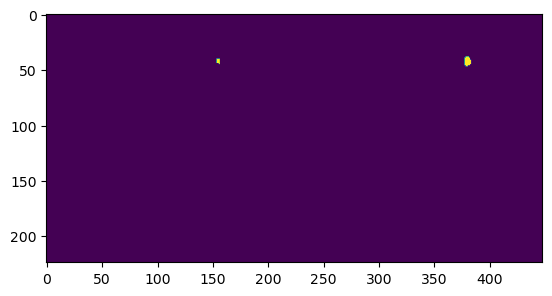

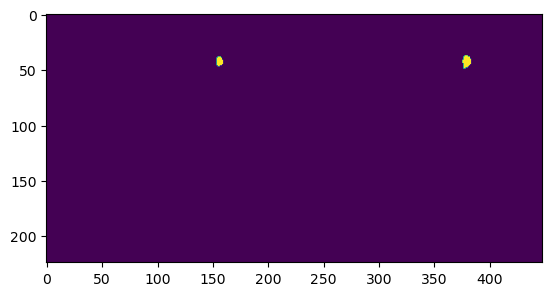

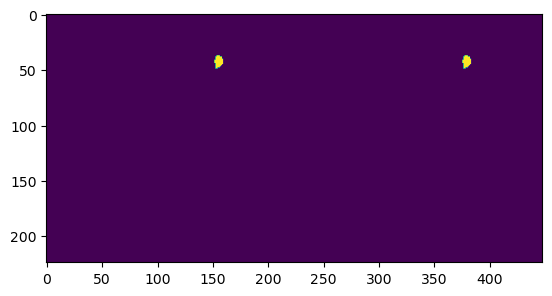

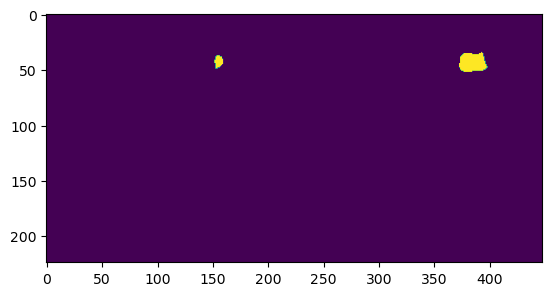

In [ ]:
plt.figure()
for i in range(5):
    plt.imshow(frames[i])
    plt.show()